First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

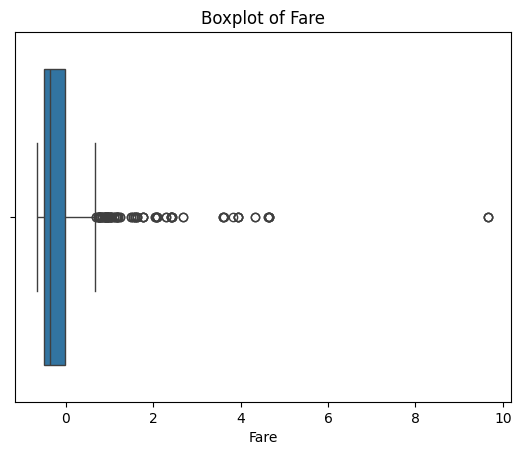


Cleaned data saved as Titanic-Dataset-cleaned.csv


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Titanic-Dataset.csv')


print("First 5 rows:")
print(df.head())            
print("\nShape:", df.shape) 
print("\nInfo:")
print(df.info())            
print("\nMissing values per column:")
print(df.isnull().sum())   
print("\nStatistics for numeric columns:")
print(df.describe())        


if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


if df['Age'].isnull().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())


if 'Embarked' in df.columns and df['Embarked'].isnull().sum() > 0:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


print("\nMissing values after filling:")
print(df.isnull().sum())


if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'])


scaler = StandardScaler()

for col in ['Age', 'Fare']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])


if 'Fare' in df.columns:
    sns.boxplot(x=df['Fare'])
    plt.title('Boxplot of Fare')
    plt.show()

    Q1 = df['Fare'].quantile(0.25)
    Q3 = df['Fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


df.to_csv('Titanic-Dataset-cleaned.csv', index=False)
print("\nCleaned data saved as Titanic-Dataset-cleaned.csv")
